In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
test=pd.read_csv('testing python.csv')
train=pd.read_csv('training data1.csv')
testawal=pd.read_csv('testingawal.csv')
trainingawal=pd.read_csv('trainingawal.csv')

In [11]:
print(test.head())

   ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1    20000.0  FEMALE       UNIVERSITY  MARRIED   24      2      2     -1   
1  11   200000.0  FEMALE      HIGH SCHOOL   SINGLE   34      0      0      2   
2  27    60000.0    MALE  GRADUATE SCHOOL   SINGLE   27      1     -2     -1   
3  40   280000.0    MALE  GRADUATE SCHOOL   SINGLE   31     -1     -1      2   
4  45    40000.0  FEMALE  GRADUATE SCHOOL   SINGLE   30      0      0      0   

   PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1  ...        689        0.0        0.0        0.0       0.0     689.0   
1      0  ...       5535     2513.0     1828.0     3731.0    2306.0      12.0   
2     -1  ...        259      -57.0      127.0     -189.0       0.0    1000.0   
3     -1  ...       4641     9976.0    17976.0     9477.0    9075.0       0.0   
4      2  ...      25921    25209.0    26636.0    29197.0    3000.0    5000.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5 

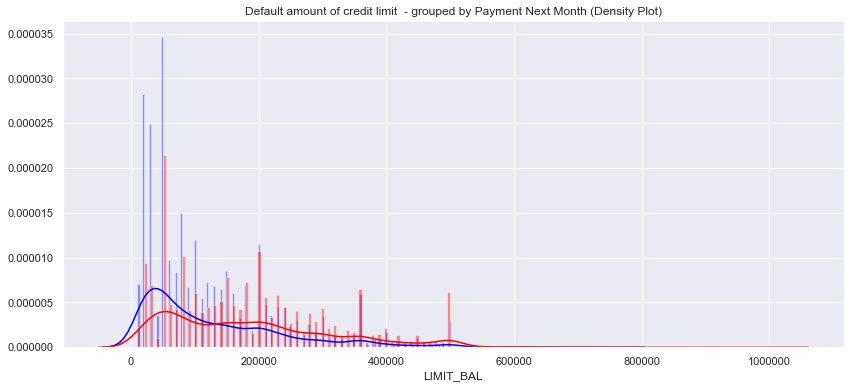

In [15]:
class_0 = trainingawal.loc[trainingawal['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = trainingawal.loc[trainingawal['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("colorblind")
sns.distplot(class_1,kde=True,bins=200, color="blue")
sns.distplot(class_0,kde=True,bins=200, color="red")
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

Do not forget about Kendall's Tau, which is another non-parametric correlation coefficient and which is applicable to scale or ordinal or ranked data. One refinement, to take account of ties, is Kendall's Tau-b. This relates to calculating the P-value if there are ties in the data. In the case of Spearman's rho, the P-value may be distorted by the presence of ties. In the original derivation of the distribution of rho, the assumption was that the observations arise from continuous variables with a zero probability of ties.

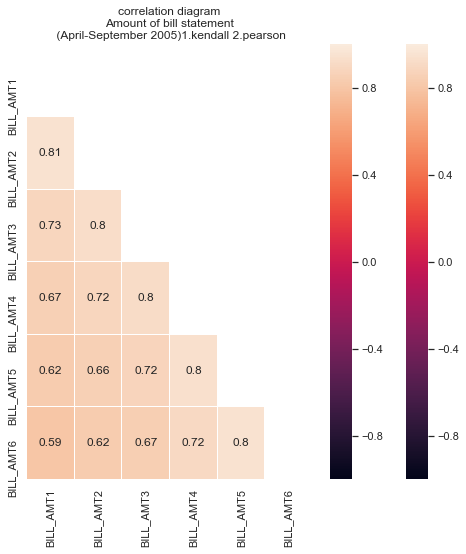

In [55]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8,8))
plt.title('correlation diagram\nAmount of bill statement\n (April-September 2005)1.kendall 2.pearson')
corr = trainingawal[var].corr(method='kendall')
corr1 = trainingawal[var].corr(method='pearson')
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,mask=mask,annot=True, linewidths=.1,vmin=-1, vmax=1)
sns.heatmap(corr1,xticklabels=corr1.columns,yticklabels=corr1.columns,mask=mask, linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

Let's check the correlation of Amount of previous payment in April - September 2005.

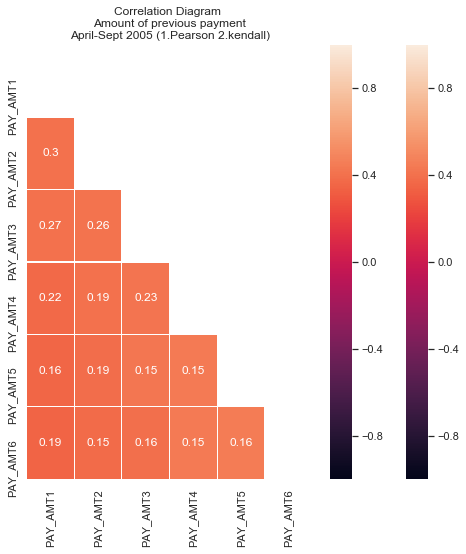

In [56]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8,8))
plt.title('Correlation Diagram \nAmount of previous payment\nApril-Sept 2005 (1.Pearson 2.kendall)')
corr = trainingawal[var].corr(method='pearson')
corr1 = trainingawal[var].corr(method='kendall')
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,mask=mask,linewidths=.1,annot=True,vmin=-1, vmax=1)
sns.heatmap(corr1,xticklabels=corr1.columns,yticklabels=corr1.columns,mask=mask,linewidths=.1,vmin=-1, vmax=1)
plt.show()